In [330]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [331]:
def read_data_files():
    df = pd.DataFrame()
    for fn in glob.glob("expr1/*.csv"):
        tmp = pd.read_csv(fn, header=0)
        df = df.append(tmp, ignore_index=True)
    return df

In [332]:
df = read_data_files()

In [333]:
df2 = df.groupby(["qdepth", "mode", "runid"]).agg({'begin': np.min,'end': np.max, 'objsize': np.sum})
df2["dur"] = (df2["end"] - df2["begin"]) / 1000000000.0
df2["rate"] = (df2["objsize"] / 2.0**20) / df2["dur"]
del df2["begin"]
del df2["end"]
del df2["objsize"]

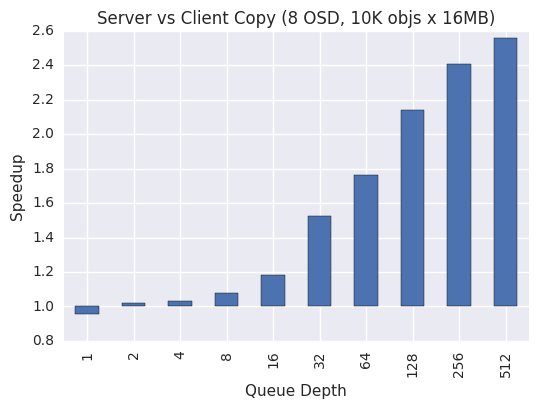

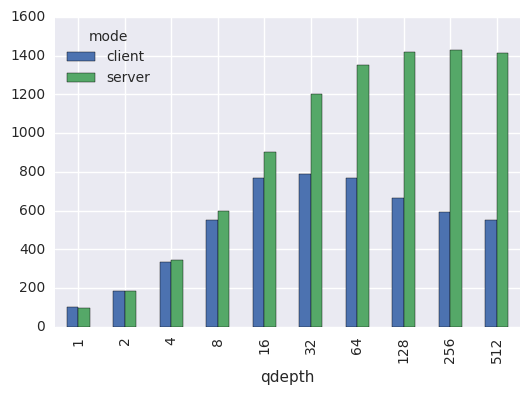

In [338]:
df3 = df2.reset_index().groupby(["qdepth", "mode"]).mean()
df4 = df3.unstack()

speedup = df4["dur"]["client"] / df4["dur"]["server"] -1.0
ax = speedup.plot.bar(legend=False)
ax.set_title("Server vs Client Copy (8 OSD, 10K objs x 16MB)")
ax.set_ylabel("Speedup")
ax.set_xlabel("Queue Depth")
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x,_: x + 1.0))

bandwidth = df4["rate"]
bandwidth.plot.bar()